                                                NOTEBOOK 3- TEMPERATURE READERS

**TABLE OF CONTENT**

1. MICE IMPUTATION 
2. DATA INTERPOLATION 
3. EVALUATE IMPUTATION ACCURACY

# MICE IMPUTATION

In [2]:
import pandas as pd
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Read the data
data = pd.read_excel('daily_means with variables.xlsx')

# Convert relevant columns to numeric
numeric_columns = ['Daily Mean', 'Air Temp', 'Rainfall', 'Sun Hours']
data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Ensure the data is sorted by the date index
data['Date'] = pd.to_datetime(data['Date'])
data = data.sort_values(by='Date')

# Identify the target variable with missing values ('Daily Mean')
target_variable = 'Daily Mean'

# Create a copy of the dataset to impute missing values
imputed_data = data.copy()

# Initialize and configure the Iterative Imputer
imputer = IterativeImputer(max_iter=10, random_state=0)

# Add lag (past) and lead (future) columns for the 'Daily Mean' temperature
num_lags = 2
num_leads = 2

for lag in range(1, num_lags + 1):
    imputed_data[f'Daily Mean Lag {lag}'] = imputed_data['Daily Mean'].shift(lag)

for lead in range(1, num_leads + 1):
    imputed_data[f'Daily Mean Lead {lead}'] = imputed_data['Daily Mean'].shift(-lead)

# Perform imputation for the 'Daily Mean' column using the predictor variables
columns_for_imputation = ['Air Temp', 'Rainfall', 'Sun Hours', target_variable]
imputed_data[columns_for_imputation] = imputer.fit_transform(imputed_data[columns_for_imputation])




# Reordering the columns
imputed_data = imputed_data[['Date'] + ['Daily Mean'] + [f'Daily Mean Lag {lag}' for lag in range(1, num_lags + 1)] +
                            [f'Daily Mean Lead {lead}' for lead in range(1, num_leads + 1)] +
                            ['Air Temp', 'Rainfall', 'Sun Hours']]

imputed_data.head(35)



,Date,Daily Mean,Daily Mean Lag 1,Daily Mean Lag 2,Daily Mean Lead 1,Daily Mean Lead 2,Air Temp,Rainfall,Sun Hours
0,1991-05-02,9.801667,NaN,NaN,10.648958,11.632812,7.3,0.0,7.9
1,1991-05-03,10.648958,9.801667,NaN,11.632812,10.510417,7.9,2.6,10.9
2,1991-05-04,11.632812,10.648958,9.801667,10.510417,10.928646,9.0,0.1,7.9
3,1991-05-05,10.510417,11.632812,10.648958,10.928646,11.158854,7.9,0.0,3.1
4,1991-05-06,10.928646,10.510417,11.632812,11.158854,10.527604,7.9,1.9,9.6
5,1991-05-07,11.158854,10.928646,10.510417,10.527604,11.571287,8.5,5.2,1.6
6,1991-05-08,10.527604,11.158854,10.928646,11.571287,12.055729,8.5,0.3,2.3
7,1991-05-09,11.571287,10.527604,11.158854,12.055729,12.204167,9.3,0.0,10.5
8,1991-05-10,12.055729,11.571287,10.527604,12.204167,12.686458,9.6,0.0,8.1
9,1991-05-11,12.204167,12.055729,11.571287,12.686458,13.742347,10.5,0.0,4.9


In [3]:
imputed_data.to_excel('imputed_data_with_lags_and_leads.xlsx', index=False)


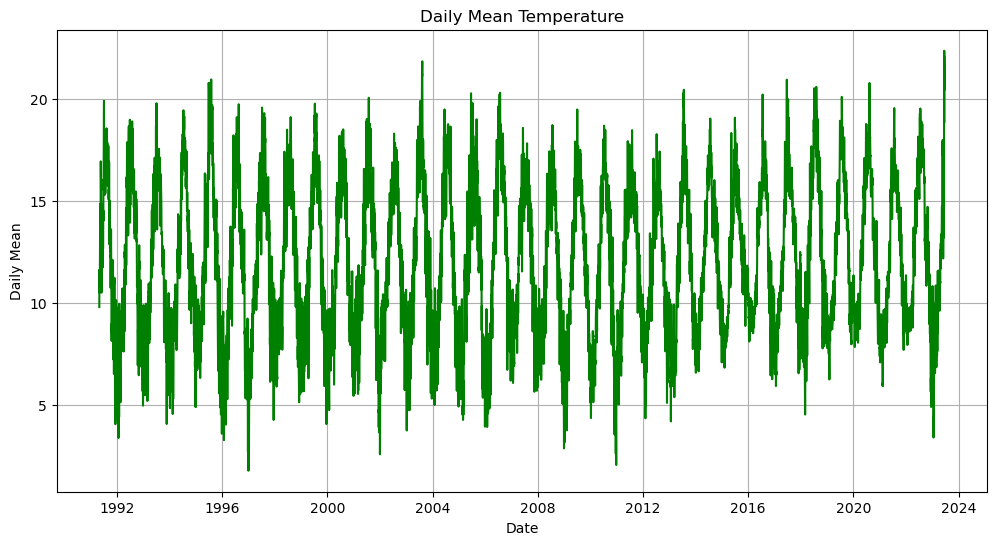

In [4]:

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))


plt.plot(imputed_data['Date'], imputed_data['Daily Mean'],  color='green')


plt.xlabel('Date')
plt.ylabel('Daily Mean')
plt.title('Daily Mean Temperature')
plt.grid(True)

# Show the plot
plt.show()

# DATA INTERPOLATION

In [5]:
import pandas as pd

# Create a copy of the original data for interpolation
data_interpolated = data.copy()

# Sort the original data by the date index, just to ensure it's sorted
data_interpolated['Date'] = pd.to_datetime(data_interpolated['Date'])
data_interpolated = data_interpolated.sort_values(by='Date')

# Perform linear interpolation on the 'Daily Mean' column
data_interpolated['Interpolated Daily Mean'] = data_interpolated['Daily Mean'].interpolate(method='linear')

# Reorder the columns as needed
data_interpolated = data_interpolated[['Date', 'Daily Mean', 'Interpolated Daily Mean']]

# Display the interpolated data
data_interpolated.head(35)



,Date,Daily Mean,Interpolated Daily Mean
0,1991-05-02,9.801667,9.801667
1,1991-05-03,10.648958,10.648958
2,1991-05-04,11.632812,11.632812
3,1991-05-05,10.510417,10.510417
4,1991-05-06,10.928646,10.928646
5,1991-05-07,11.158854,11.158854
6,1991-05-08,10.527604,10.527604
7,1991-05-09,11.571287,11.571287
8,1991-05-10,12.055729,12.055729
9,1991-05-11,12.204167,12.204167


In [6]:
# Save the interpolated data to a new Excel file
data_interpolated.to_excel('interpolated_data.xlsx', index=False)


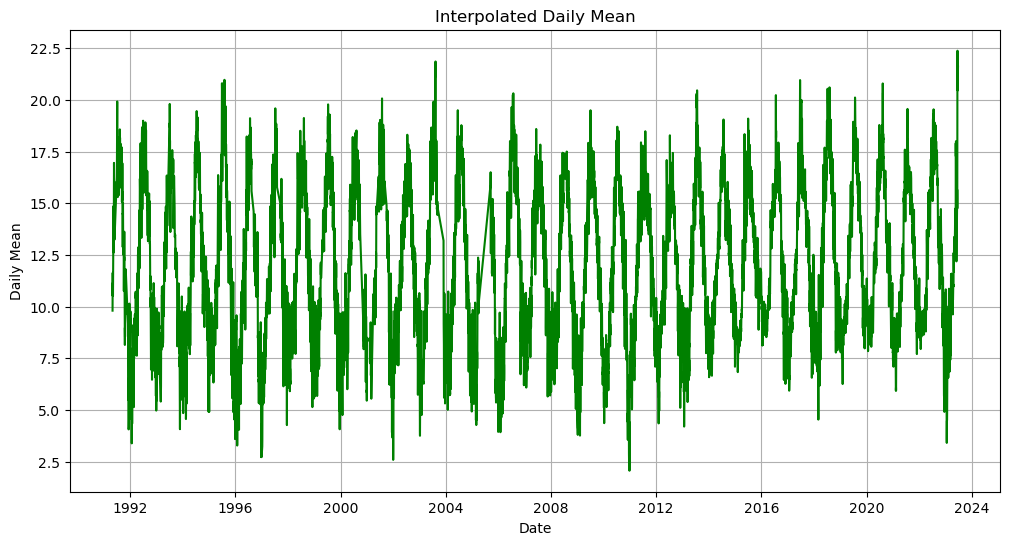

In [7]:
plt.figure(figsize=(12, 6))


plt.plot(data_interpolated['Date'], data_interpolated['Interpolated Daily Mean'],  color='green')


plt.xlabel('Date')
plt.ylabel('Daily Mean')
plt.title('Interpolated Daily Mean')
plt.grid(True)

# Show the plot
plt.show()

# EVALUATE IMPUTATION ACCURACY

1. **Create a copy of the data file**:
   -  duplicate (copy) of original dataset to perform data manipulation without affecting the data. 

2. **Replace 10% of the daily mean values with NaNs**:
   - Selected the last 10% of values based on their index in the DataFrame and replace with NaNs.

3. **Run MICE (Multiple Imputation by Chained Equations)**:
   -  Run MICE on the copied dataset with the 10% missing values introduced in step 2.

4. **Using the index from step 2, take the supplied values for those 10% of the rows from the original data file**:
   - In this step, two sets of data were retrieved:
     a. The "supplied values" represent the imputed values generated by MICE for the 10% missing rows. These are the imputed values.
     b. The "true values" are taken from the original data file. These are the actual, observed values that were replaced with NaNs in step 2.

5. **Calculate RMSE and MAE between them**:
   -  Calculate RMSE for the 10% of rows where values were replaced in step 2 by comparing the "supplied values" (from step 4a) with the "true values" (from step 4b).



In [8]:
import pandas as pd
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

data = pd.read_excel('imputed_data_with_lags_and_leads.xlsx')

# Create a copy of the data
original_data = data.copy()

# Identify the target variable with missing values ('Daily Mean')
target_variable = 'Daily Mean'

# Calculate the number of rows for the last 10% of the data
last_10_percent = int(0.10 * len(data))

# Create a copy of the dataset to impute missing values
imputed_data = data.copy()

# Replace the last 10% 'Daily Mean' values with NaN
imputed_data.loc[imputed_data.index[-last_10_percent:], target_variable] = np.nan

# Configure the Iterative Imputer
imputer = IterativeImputer(max_iter=10, random_state=0)

# Perform imputation for the 'Daily Mean' column using the predictor variables
columns_for_imputation = ['Air Temp', 'Rainfall', 'Sun Hours', target_variable]
imputed_data[columns_for_imputation] = imputer.fit_transform(imputed_data[columns_for_imputation])

# Extract the true 'Daily Mean' values for the missing rows
true_daily_mean = original_data.loc[imputed_data.index[-last_10_percent:], 'Daily Mean'].values

# Calculate RMSE between true and imputed 'Daily Mean' values
rmse = sqrt(mean_squared_error(true_daily_mean, imputed_data.loc[imputed_data.index[-last_10_percent:], target_variable]))

# Calculate MAE between true and imputed 'Daily Mean' values
mae = mean_absolute_error(true_daily_mean, imputed_data.loc[imputed_data.index[-last_10_percent:], target_variable])

# Print the RMSE and MAE
print(f'Root Mean Squared Error (RMSE) between true and imputed "Daily Mean" values for the last 10% of the data: {rmse:.4f}')
print(f'Mean Absolute Error (MAE) between true and imputed "Daily Mean" values for the last 10% of the data: {mae:.4f}')


Root Mean Squared Error (RMSE) between true and imputed "Daily Mean" values for the last 10% of the data: 1.3016
Mean Absolute Error (MAE) between true and imputed "Daily Mean" values for the last 10% of the data: 1.0286


In [9]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

# Read the data
data = pd.read_excel('interpolated_data.xlsx')

# Create a copy of the data
original_data = data.copy()

# Identify the target variable ('Interpolated Daily Mean')
target_variable = 'Interpolated Daily Mean'

# Calculate the number of rows for the last 10% of the data
last_10_percent = int(0.10 * len(data))

# Create a copy of the dataset to impute missing values
imputed_data = data.copy()

# Replace the last 10% 'Interpolated Daily Mean' values with NaN
imputed_data.loc[imputed_data.index[-last_10_percent:], target_variable] = np.nan

# Extract the true 'Interpolated Daily Mean' values for the missing rows from the original data
true_daily_mean = original_data.loc[imputed_data.index[-last_10_percent:], target_variable].values

# Run interpolation (linear interpolation)
imputed_data[target_variable].interpolate(method='linear', inplace=True)

# Calculate RMSE and MAE
rmse = sqrt(mean_squared_error(true_daily_mean, imputed_data.loc[imputed_data.index[-last_10_percent:], target_variable]))

mae = mean_absolute_error(true_daily_mean, imputed_data.loc[imputed_data.index[-last_10_percent:], target_variable])

# Print the RMSE and MAE
print(f'Root Mean Squared Error (RMSE) between true and imputed "Interpolated Daily Mean" values for the last 10% of the data: {rmse:.4f}')
print(f'Mean Absolute Error (MAE) between true and imputed "Interpolated Daily Mean" values for the last 10% of the data: {mae:.4f}')


Root Mean Squared Error (RMSE) between true and imputed "Interpolated Daily Mean" values for the last 10% of the data: 3.9763
Mean Absolute Error (MAE) between true and imputed "Interpolated Daily Mean" values for the last 10% of the data: 3.2269
